<a href="https://colab.research.google.com/github/Sergei-Volkov/CellsCounter/blob/main/BasicAlgoTry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = cv.imread('/content/drive/MyDrive/Физтех/ООП проект/Эмбриологические_снимки/image0013.tif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# New Section

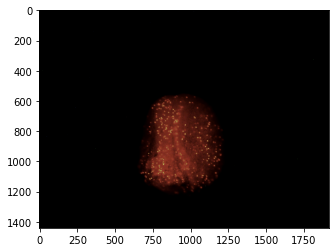

In [ ]:
plt.imshow(img)

In [ ]:
def cropped_img(img, layer=0, threshold=0):
    mask = img[:, :, 0] > 0
    x_axis, y_axis= np.argwhere(np.sum(mask, axis=0) >= threshold), np.argwhere(np.sum(mask, axis=1) >= threshold)
    x, w, y, h = x_axis.min(), x_axis.ptp(), y_axis.min(), y_axis.ptp()
    return img[x:x+w, y:y+h, layer]

In [ ]:
crp_img = cropped_img(img, threshold=4)
bright_dots = crp_img.max() - 100 <= crp_img

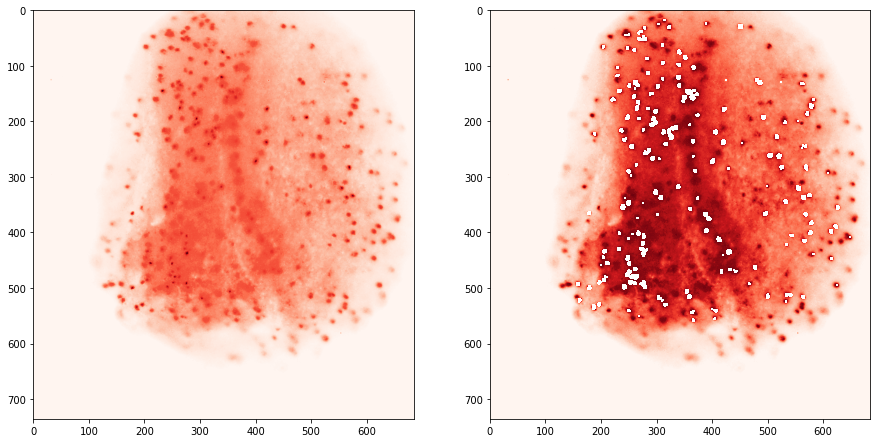

In [ ]:
plt.figure(figsize=(15,15))
masked = np.ma.masked_where(bright_dots, crp_img)  # лучше результата так не добиться
plt.subplot(1,2,1)
plt.imshow(crp_img, cmap='Reds')
plt.subplot(1,2,2)
plt.imshow(masked, cmap='Reds')
plt.show()

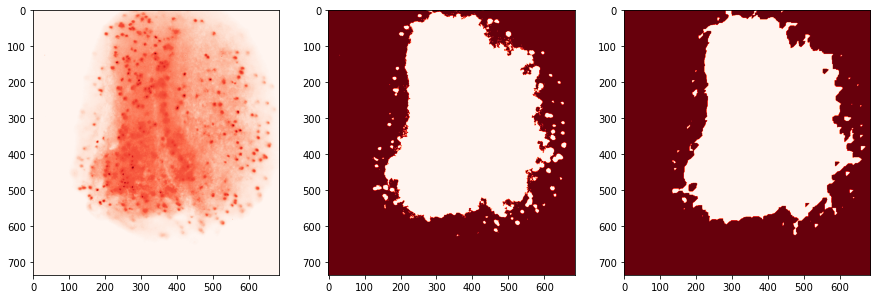

In [ ]:
# Load image, grayscale, Otsu's threshold
# gray = cv.cvtColor(crp_img, cv.COLOR_BGR2GRAY)
thresh = cv.threshold(crp_img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

# Filter out large non-connecting objects
cnts = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv.contourArea(c)
    if area < 500:
        cv.drawContours(thresh,[c],0,0,-1)

# Morph open using elliptical shaped kernel
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2,2))
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=10)

# Find circles 
cnts = cv.findContours(opening, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv.contourArea(c)
    if area > 3 and area < 10:
        ((x, y), r) = cv.minEnclosingCircle(c)
        cv.circle(cv.UMat(crp_img), (int(x), int(y)), int(r), (36, 255, 12), 2)

plt.figure(figsize=(15, 15))
plt.subplot(1,3,1)
plt.imshow(crp_img, cmap='Reds')
plt.subplot(1,3,2)
plt.imshow(thresh, cmap='Reds')
plt.subplot(1,3,3)
plt.imshow(opening, cmap='Reds')